In [1]:
# CONTAINS ALL NECESSARY FUNCTIONALITY FOR THIS EXERCISE:
from Modules import OIP20_lib_ImageProcessing_V7_16bit as ip  
# (for this to work, you need:
#  * a subfolder named "Modules" in your Notebook folder
#  * in this subdfolder you need an empty file named "__init__.py"
#  * and of course the library (.py file) named "OIP20_lib_ImageProcessing_V1.py")

# if you want to use other functionality here, you need to load the libraries again: 
import matplotlib.pyplot as plt # We need this here only for closing the open windows
import numpy as np # we want to use some math...
from Modules import tictoc as t

# for nice(r) potting in the notebook
%matplotlib inline 

##  If not in Jupyter: close all open plots (otherwise you will get tons of them after some time...)
# plt.close("all")

# Some house holding: 
#  Higher resolution for figures:
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)

# for interactive graphing: 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
particles_frequency_001 = np.load('./images/dataset/001_particles.npy')
diameter_frequency_001 = np.load('./images/dataset/001_diameter.npy')

In [3]:
particles_frequency_006 = np.load('./images/dataset/006_particles.npy')
diameter_frequency_006 = np.load('./images/dataset/006_diameter.npy')

In [4]:
particles_frequency = np.concatenate((particles_frequency_001,particles_frequency_006))
diameter_frequency = np.concatenate((diameter_frequency_001,diameter_frequency_006))

In [5]:
from matplotlib.ticker import MaxNLocator
import collections

def plot_result(result, xlabel='x', ylabel='y'):
    fig, ax = plt.subplots(1,3,figsize=(20,5))
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel, color='tab:blue')
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax[0].axvline(np.mean(result), color='k', linestyle='--', linewidth=3)
    ax[0].axvline(np.median(result), color='b', linestyle='-', linewidth=3)
    ax[0].text(np.mean(result), np.amax(result), 'Mean: {:.2f}'.format(np.mean(result)))
    ax[0].text(np.median(result), np.amax(result)*0.7, 'Median: {:.2f}'.format(np.median(result)))
    
#     counts, bins = np.histogram(result)
#     ax[0].hist(bins[:-1], bins, weights=counts)
    hist = collections.Counter(result)
    ax[0].bar(hist.keys(),hist.values(),width=1)

    
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel, color='tab:blue')
    ax[1].boxplot(result, vert=False)
    
    ax[2].set_xlabel(xlabel)
    ax[2].set_ylabel(ylabel, color='tab:blue')
    ax[2].violinplot(result, vert=False)
    plt.show()

In [ ]:
plot_result(particles_frequency, xlabel='diameter of each particles', ylabel='frequency')

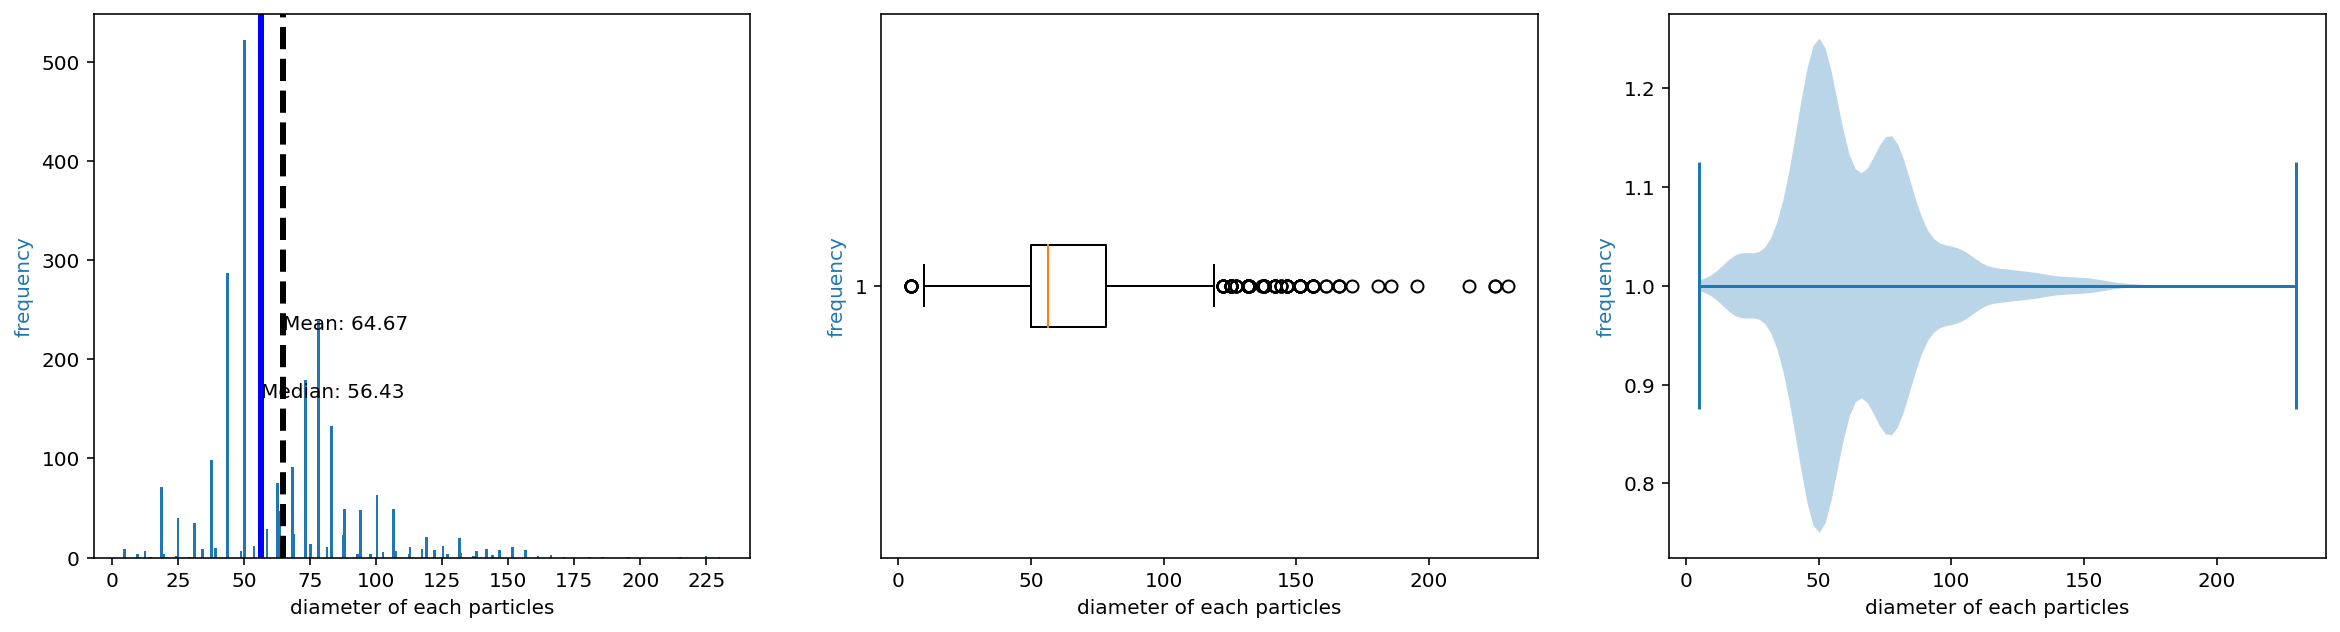

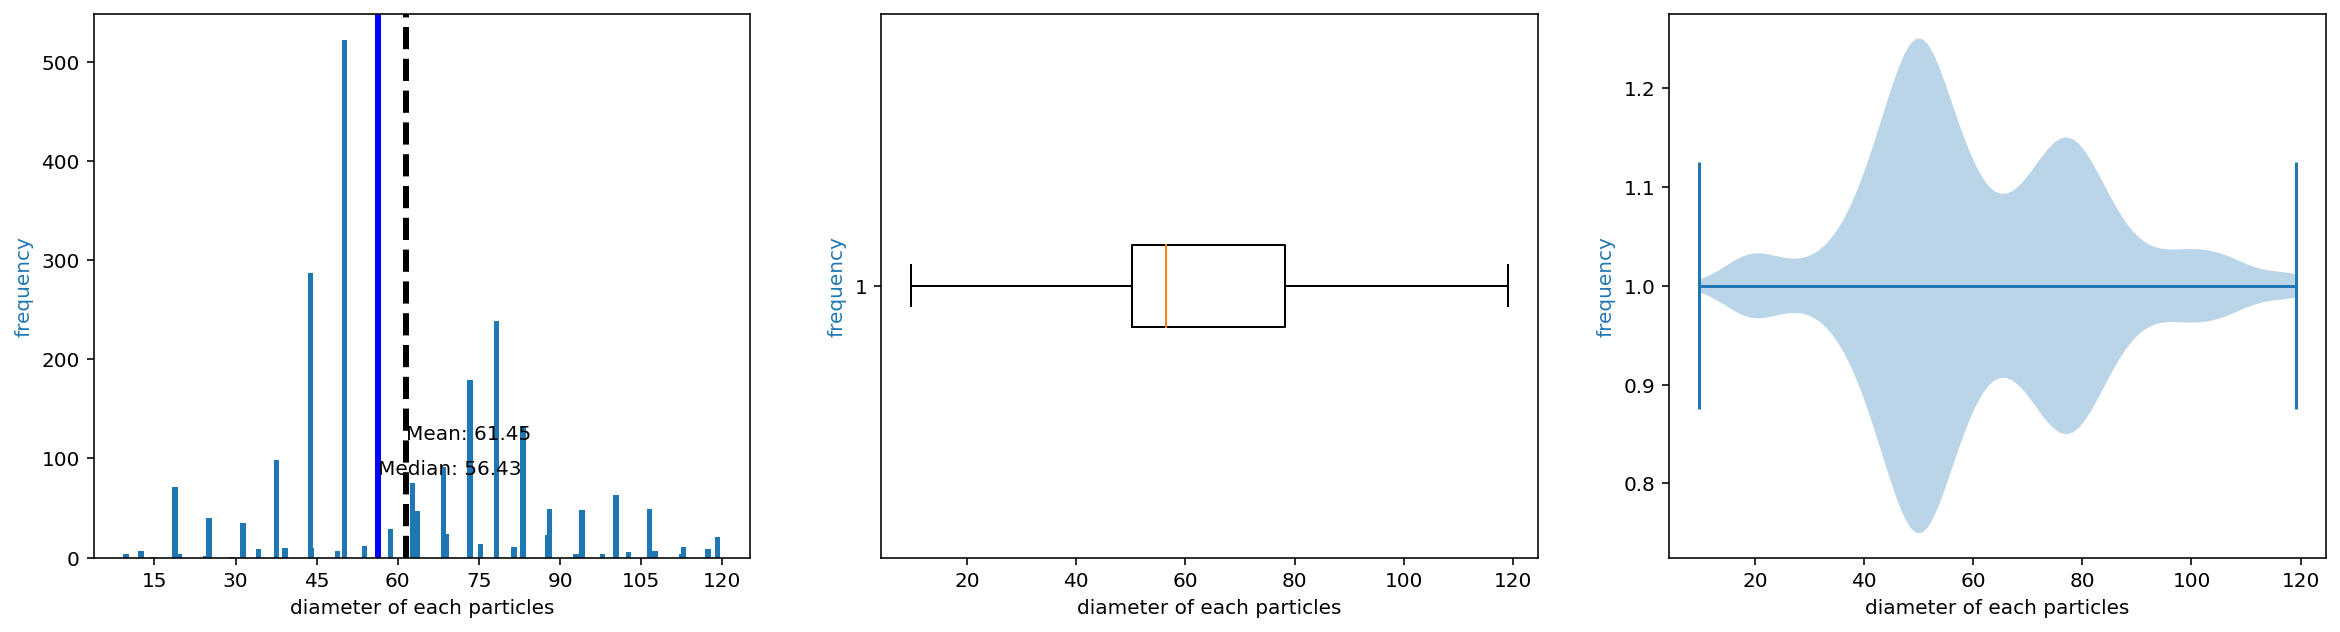

In [6]:
# remove outliers
diameter_frequency_1 = diameter_frequency[(diameter_frequency >= 5) & (diameter_frequency <= 120)]
plot_result(diameter_frequency, xlabel='diameter of each particles', ylabel='frequency')
plot_result(diameter_frequency_1, xlabel='diameter of each particles', ylabel='frequency')

In [ ]:
def statistic(result):
#     print(result)
    print(np.mean(result)) # sum of all the entries divided by the number of entries / the average value 
    print(np.median(result)) # the middle point of the number of entries
    print(np.var(result)) # measures how far a set of numbers is spread out from their average value
    print(np.std(result)) # a measure of the amount of variation or dispersion of a set of values.

In [ ]:
statistic(particles_frequency)

In [ ]:
statistic(diameter_frequency)

In [ ]:
statistic(diameter_frequency_1)

### Extract data
#### X1: number of particles of each cluster
#### X2: diameter of each particle

In [127]:
import collections 

std1 = np.std(particles_frequency)
mean1 = np.mean(particles_frequency)

hist1 = collections.Counter(particles_frequency)
sorted_hist1 = {i: hist1[i] for i in sorted(hist1)}
X1 = np.array(list(sorted_hist1.keys()))
Y1 = np.array(list(sorted_hist1.values()))
# print(X1)
# print(Y1)

In [128]:
# std2 = np.std(diameter_frequency)
# mean2 = np.mean(diameter_frequency)

# hist2 = collections.Counter(diameter_frequency)
# sorted_hist2 = {i: hist2[i] for i in sorted(hist2)}
# X2 = np.array(list(sorted_hist2.keys()))
# Y2 = np.array(list(sorted_hist2.values()))
# print(len(X2))
# print(Y2)

std2 = np.std(diameter_frequency_1)
mean2 = np.mean(diameter_frequency_1)

hist2 = collections.Counter(diameter_frequency_1)
sorted_hist2 = {i: hist2[i] for i in sorted(hist2)}
X2 = np.array(list(sorted_hist2.keys()))
Y2 = np.array(list(sorted_hist2.values()))
# print(X2)
# print(Y2)

In [129]:
from sympy import *
A, B = symbols("A B")
def single_gaussian_func_1(A, B, x):
    return (A/(std1*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mean1)/std1)**2) + B

def residual_1(A, B, x, y):
    return y - single_gaussian_func_1(A, B, x)

def calc_error_1(A, B, x, y):
    return sum(residual_1(A, B, x, y)**2)

In [130]:
from sympy import *
A, B = symbols("A B")
def single_gaussian_func_2(A, B, x):
    return (A/(std2*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mean2)/std2)**2) + B

def residual_2(A, B, x, y):
    return y - single_gaussian_func_2(A, B, x)

def calc_error_2(A, B, x, y):
    return sum(residual_2(A, B, x, y)**2)

In [131]:
# Newton_method
f = calc_error_1(A, B, X1, Y1)
grad_f = Matrix([f]).jacobian([A, B])
grad_ff=hessian(f,[A,B]) ## Hessian  

In [132]:
X= np.array([[0.1],[0.2]]) ## Intial guess x_n
xk=X[0][0] ## Intial guess x_n
yk=X[1][0] ## Intial guess x_n
print(X[1][0])
epsilon = 1e-6 # Pick the tolerance 
count = 0 # for the number of iteration 
nMax=30 # maximum number of iteration

0.2


In [133]:
while count < nMax:
    count += 1 # count the loop iterations...
    df = transpose(grad_f.subs({A:xk, B:yk}))
    dff = grad_ff.subs({A:xk, B:yk})
    H=np.array([[dff[0,0],dff[0,1]],[dff[1,0],dff[1,1]]])
    H=H.astype(float)
    xn=np.array([[xk],[yk]])
    X=X-np.linalg.inv(H)*df
    Xn=np.array(X)
    xk=Xn[0][0]
    yk=Xn[1][0]
    #error=np.sqrt((xk-xn[0][0])**2+(yk-xn[1][0])**2)
    print('Step: %i-- new guess x: %e-- new guess y: %e' %(count,xk,yk))

Step: 1-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 2-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 3-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 4-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 5-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 6-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 7-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 8-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 9-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 10-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 11-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 12-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 13-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 14-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 15-- new guess x: 5.386900e+02-- new guess y: 5.250074e-01
Step: 16-- new guess x: 5.386900e+

In [134]:
def plot_single_curve(xnew, ynew, measuredX, measuredY, data, ftype, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5))
    ax.scatter(measuredX, measuredY, marker= 'o')
    
    if ftype == 1:
        ax.plot(measuredX,single_gaussian_func_1(xnew, ynew, measuredX))
    elif ftype == 2:
        ax.plot(measuredX,single_gaussian_func_2(xnew, ynew, measuredX))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, color='tab:blue')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axvline(np.mean(data), color='k', linestyle='--', linewidth=3)
    ax.axvline(np.median(data), color='b', linestyle='-', linewidth=3)
    ax.text(np.mean(data), np.amax(data), 'Mean: {:.2f}'.format(np.mean(data)))
    ax.text(np.median(data), np.amax(data)*0.7, 'Median: {:.2f}'.format(np.median(data)))

    hist = collections.Counter(data)
    ax.bar(hist.keys(),hist.values(),width=0.1)

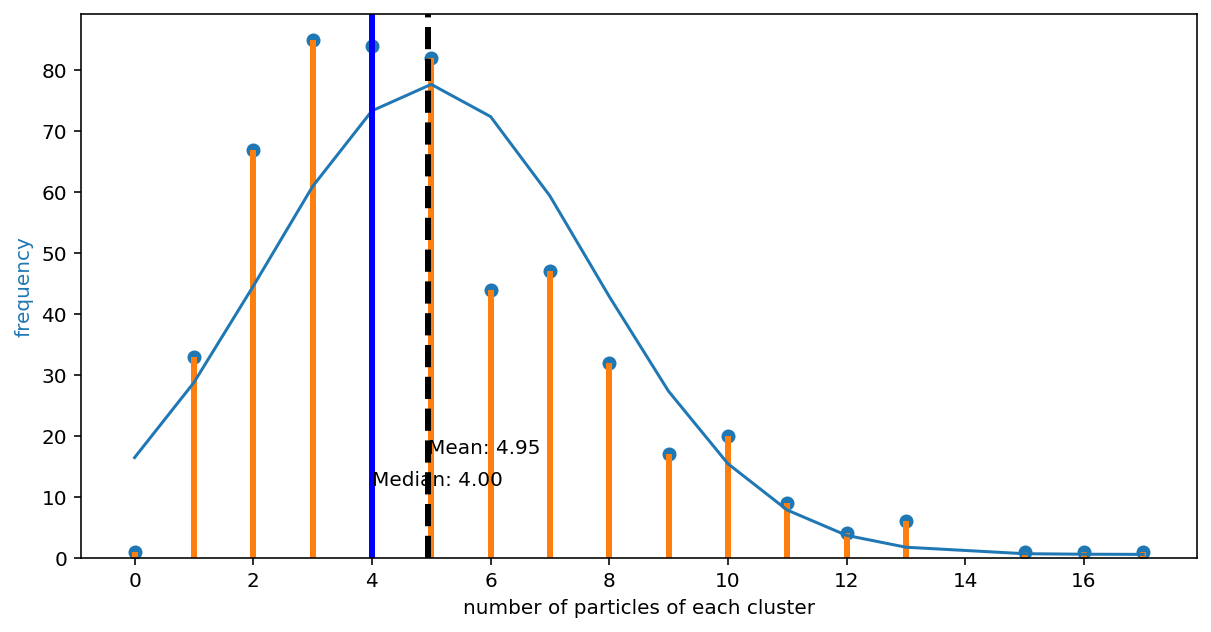

In [135]:
plot_single_curve(xk, yk, X1, Y1, particles_frequency, 1, 'number of particles of each cluster', 'frequency')

Diameter statistic

In [ ]:
f = calc_error_2(A, B, X2, Y2)
grad_f = Matrix([f]).jacobian([A, B])
grad_ff=hessian(f,[A,B]) ## Hessian  

In [ ]:
X= np.array([[1],[2]]) ## Intial guess x_n
xk=X[0][0] ## Intial guess x_n
yk=X[1][0] ## Intial guess x_n
# print(X[1][0])
epsilon = 1e-6 # Pick the tolerance 
count = 0 # for the number of iteration 
nMax=30 # maximum number of iteration

In [ ]:
while count < nMax:
    count += 1 # count the loop iterations...
    df = transpose(grad_f.subs({A:xk, B:yk}))
    dff = grad_ff.subs({A:xk, B:yk})
    H=np.array([[dff[0,0],dff[0,1]],[dff[1,0],dff[1,1]]])
    H=H.astype(float)
    xn=np.array([[xk],[yk]])
    X=X-np.linalg.inv(H)*df
    Xn=np.array(X)
    xk=Xn[0][0]
    yk=Xn[1][0]
    #error=np.sqrt((xk-xn[0][0])**2+(yk-xn[1][0])**2)
    print('Step: %i-- new guess x: %e-- new guess y: %e' %(count,xk,yk))

In [ ]:
plot_single_curve(xk, yk, X2, Y2, diameter_frequency_1, 2, 'diameter of each particle', 'frequency')

### Sequence of Lorentzians

Particle

In [119]:
peak = "global"
def lorent_func(p, x):
#     xk1 = p[0]
#     yk1 = p[1]
#     pk1 = p[2]
#     xk2 = p[3]
#     yk2 = p[4]
#     pk2 = p[5]
#     xk3 = p[6]
#     yk3 = p[7]
#     pk3 = p[8]
#     xk4 = p[9]
#     yk4 = p[10]
#     pk4 = p[11]
#     return (yk1*pk1**2)/((x-xk1)**2+pk1**2) \
#             + (yk2*pk2**2)/((x-xk2)**2+pk2**2) \
#             + (yk3*pk3**2)/((x-xk3)**2+pk3**2) \
#             + (yk4*pk4**2)/((x-xk4)**2+pk4**2)
    J = 0
    for i in range(peak):
        J += (p[i+1]*p[i+1]**2)/((x-p[i])**2+p[i+2]**2)
    return J
def residual(p):
    x = X1
    y = Y1
    return y - lorent_func(p, x)
# least square
def calc_error(p):
    return sum(residual(p)**2)

In [120]:
# jacobian of calc_error function
def opti_jac(p):
    return Jacobian(lambda p: calc_error(p))(p).ravel()
# hessian of calc_error function
def opti_hess(p):
    return Hessian(lambda p: calc_error(p))(p) 

In [150]:
from scipy.interpolate import interp1d
def plot_fitting_func(args, measuredX, measuredY, data, ptype, xlabel, ylabel):
    if ptype == 'lorent':
        y = lorent_func(args,measuredX)
    elif ptype == 'gaussian':
        y = gaussian_func(args,measuredX)
    xnew = np.linspace(measuredX.min(), measuredX.max(), 300)
    ynew = interp1d(measuredX, y, kind='cubic')

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5))
    ax.scatter(measuredX, measuredY, marker= 'o')
    ax.plot(xnew, ynew(xnew))
#     ax.plot(measuredX, y)
    ax.set_xticks(np.arange(0, np.amax(measuredX), 10))
    ax.set_yticks(np.arange(0, np.amax(measuredY), np.amax(measuredY)/10))
    plt.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, color='tab:blue')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axvline(np.mean(data), color='k', linestyle='--', linewidth=3)
    ax.axvline(np.median(data), color='b', linestyle='-', linewidth=3)
    ax.text(np.mean(data), np.amax(particles_frequency), 'Mean: {:.2f}'.format(np.mean(data)))
    ax.text(np.median(data), np.amax(particles_frequency)*0.7, 'Median: {:.2f}'.format(np.median(data)))
    hist = collections.Counter(data)
    ax.bar(hist.keys(),hist.values(),width=0.2)

In [151]:
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from numpy.linalg import norm 
from numdifftools import Jacobian, Hessian

In [152]:
peak = 4
P0=np.array([3,1,0.1,
             5,1,0.1,
             7,1,0.1,
             10,1,0.1])
Resedual = minimize(calc_error, P0, method='Nelder-Mead' ,options={'xatol': 1e-8, 'disp': True})
print(Resedual.x)

[   2.66636549    3.94037292    1.15068936    4.76098077    6.75383744
    2.11368909 -168.34470009    1.17942144   -2.38511018   71.2579831
   20.79431996   -0.56324118]


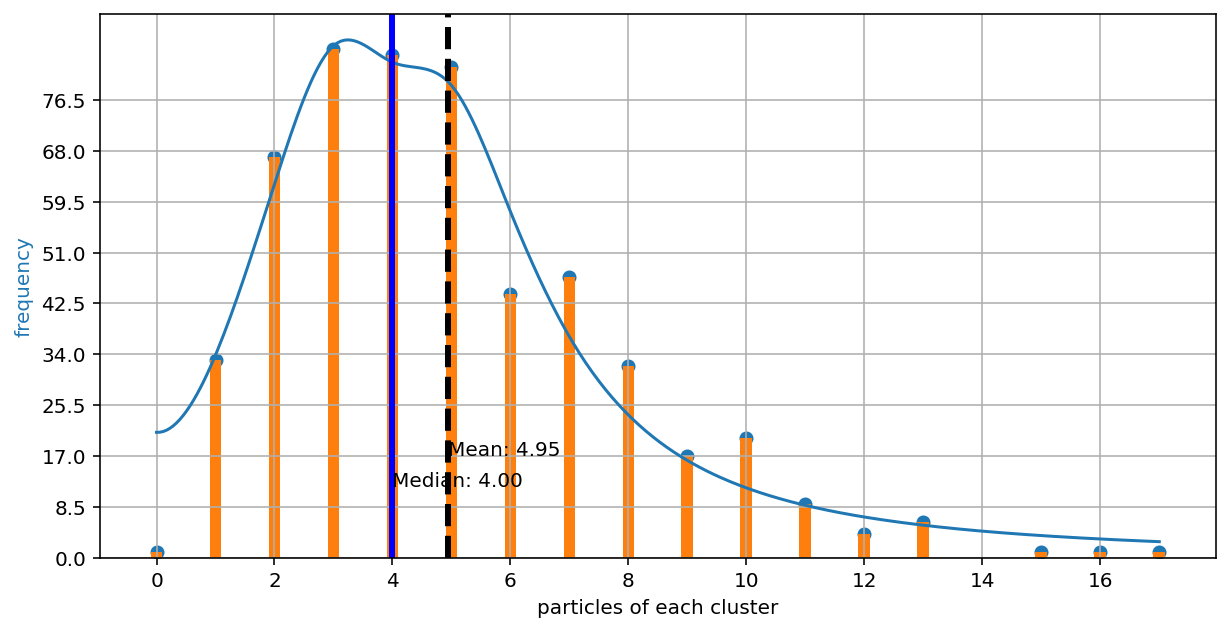

In [153]:
plot_fitting_func(Resedual.x, X1, Y1, particles_frequency,'lorent','particles of each cluster','frequency')

In [136]:
Resedual = minimize(calc_error, P0, method='Newton-CG',jac=opti_jac, hess=opti_hess ,options={'disp': True})

Optimization terminated successfully.
         Current function value: 1205.890475
         Iterations: 139
         Function evaluations: 184
         Gradient evaluations: 322
         Hessian evaluations: 139


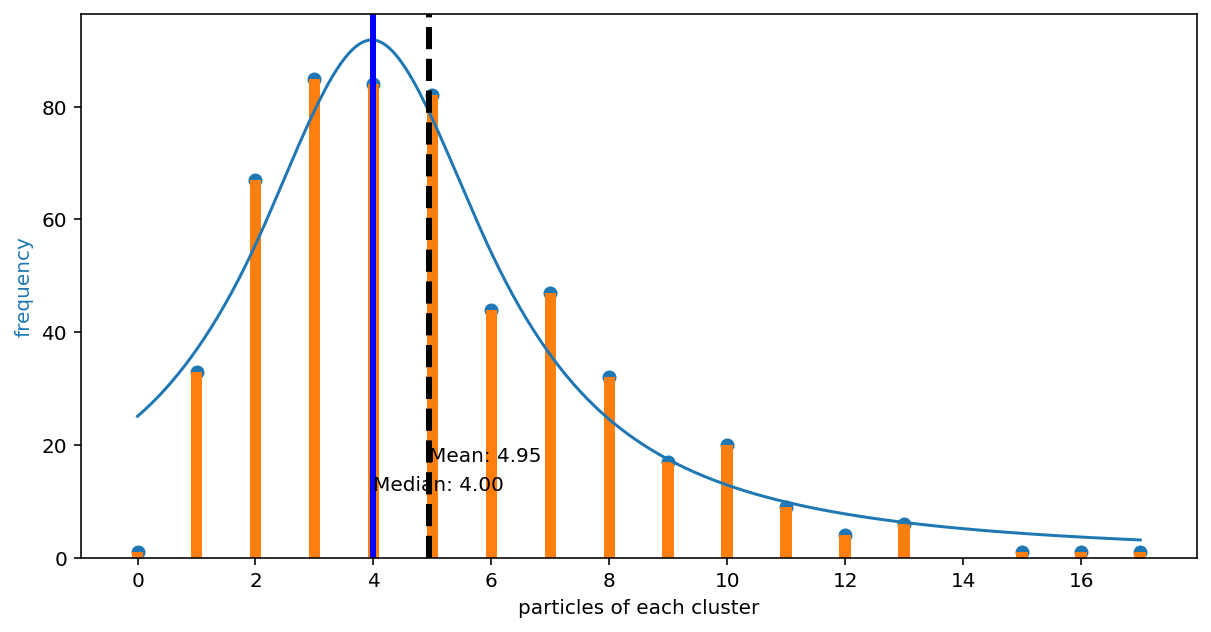

In [137]:
plot_fitting_func(Resedual.x, X1, Y1, particles_frequency,'lorent','particles of each cluster','frequency')

In [ ]:
from scipy.optimize.linesearch import line_search_armijo

start_point = np.array([3,1,0.1,
             5,1,0.1,
             7,1,0.1,
             10,1,0.1])

line_search_armijo(calc_error, opti_jac(start_point), start_point, -opti_jac(start_point), 
                   old_fval=calc_error(start_point), alpha0=0.001)

Diameter

In [125]:
peak = 4
P0=np.array([15,60,5,
             50,510,5,
             77,240,5,
            100,50,10])
# P0=np.array([45,500,5,
#              75,200,5,])
Resedual = minimize(calc_error, P0, method='Nelder-Mead' ,options={'xatol': 1e-8, 'disp': True})
print(Resedual.x)

[  30.62182186    4.22500614    3.96339687    8.07440554   -2.40323562
    6.90635539  132.28556619 -139.47383619   13.98520871  197.59644759
   37.10109248    5.12412697]


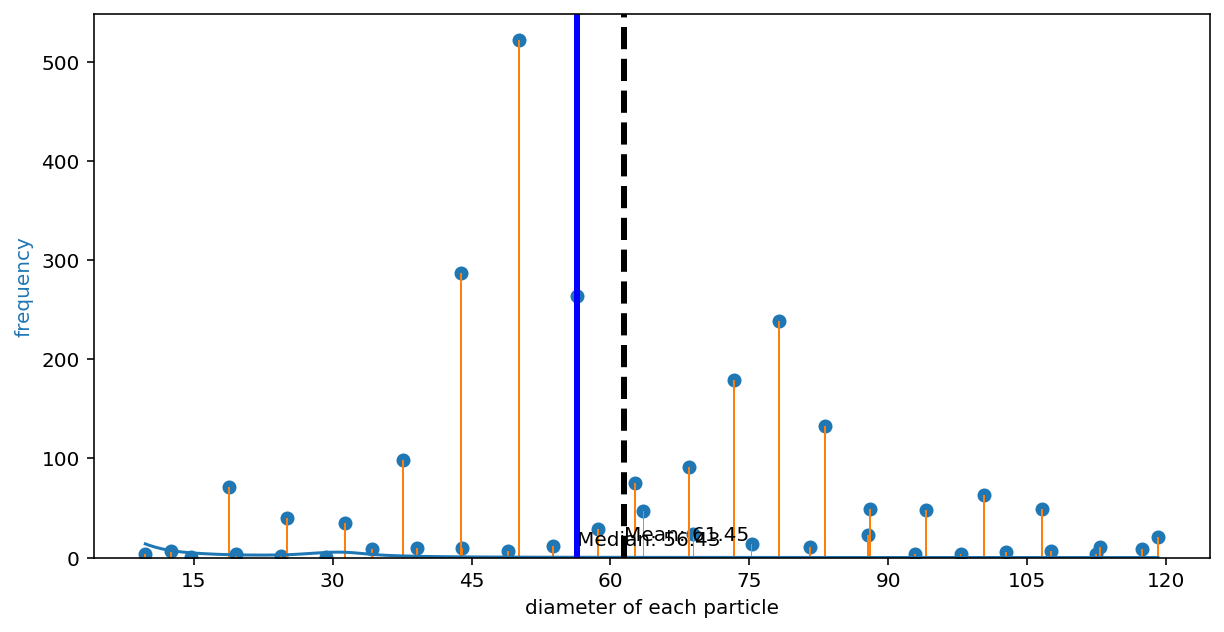

In [126]:
plot_fitting_func(Resedual.x, X2, Y2, diameter_frequency_1,'lorent','diameter of each particle','frequency')

In [35]:
Resedual = minimize(calc_error, P0, method='Newton-CG',jac=opti_jac, hess=opti_hess ,options={'disp': True})

         Current function value: 15808.780237
         Iterations: 1200
         Function evaluations: 1286
         Gradient evaluations: 2485
         Hessian evaluations: 1200


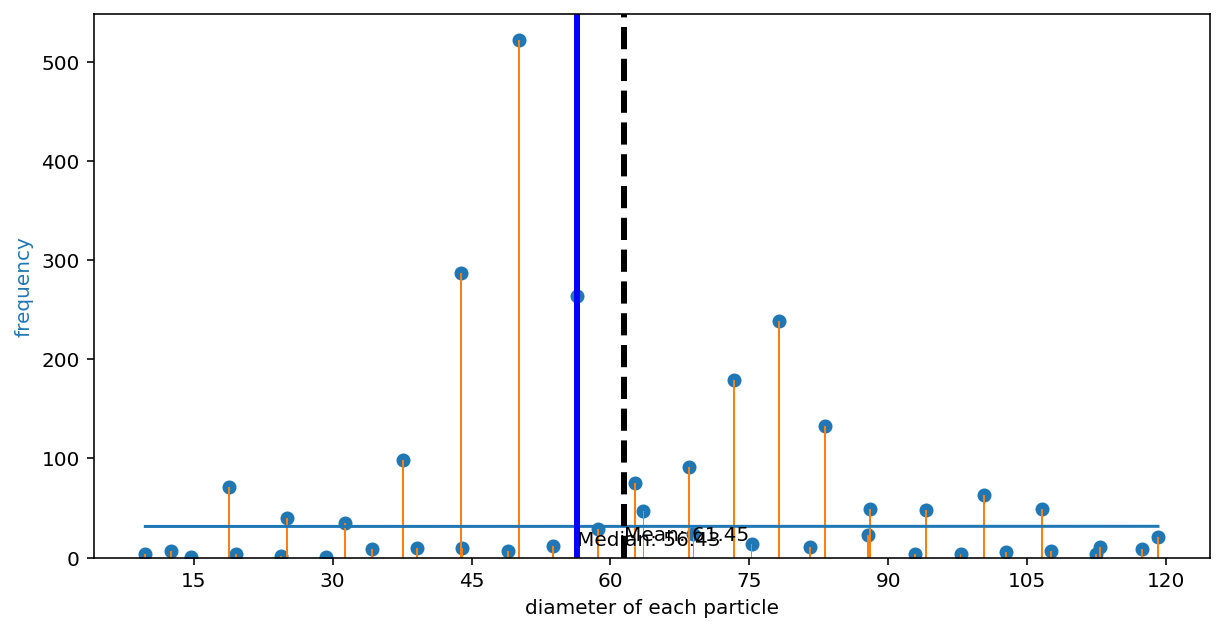

In [36]:
plot_fitting_func(Resedual.x, X2, Y2, diameter_frequency_1,'lorent','diameter of each particle','frequency')

### Sequence of Gaussian

In [ ]:
# def gaussian_func(p, x):
#     amp1 = p[0]
#     sigma1 = p[1]
#     cen1 = p[2]
#     amp2 = p[3]
#     sigma2 = p[4]
#     cen2 = p[5]
# #     amp3 = p[6]
# #     sigma3 = p[7]
# #     cen3 = p[8]
# #     amp4 = p[9]
# #     sigma4 = p[10]
# #     cen4 = p[11]
#     return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) \
#             + amp2*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))
# #             + amp3*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) \
# #             + amp4*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))
# def residual(p):
#     x = X2
#     y = Y2
#     return y - gaussian_func(p, x)
# # least square
# def calc_error(p):
#     return sum(residual(p)**2)

In [ ]:
# P0=np.array([50,1,20,
#              500,1,50,
#              200,1,75,
#              50,1,100])
# P0=np.array([500,10,50,
#              200,10,75])
# Resedual = minimize(calc_error, P0, method='Nelder-Mead' ,options={'xatol': 1e-8, 'disp': True})
# print(Resedual.x)

In [ ]:
# plot_fitting_func(Resedual.x, X2, Y2, diameter_frequency_1,'gaussian','diameter of each particle','frequency')

In [97]:
# P0=np.array([50,500,10,
#              75,10,200])

P0=np.array([20,70,5,
             35,70,5,
             50,500,5,
             75,200,10,
            100,40,10])
# p = [cen1, amp1, sigma1, cen2, amp2, sigma2]
def gaussian_func(x, cen1, amp1, sigma1, cen2, amp2, sigma2, cen3, amp3, sigma3, cen4, amp4, sigma4, cen5, amp5, sigma5):
#     amp1 = p[0]
#     sigma1 = p[1]
#     cen1 = p[2]
#     amp2 = p[3]
#     sigma2 = p[4]
#     cen2 = p[5]
#     amp3 = p[6]
#     sigma3 = p[7]
#     cen3 = p[8]
#     amp4 = p[9]
#     sigma4 = p[10]
#     cen4 = p[11]
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) \
            + amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2))) \
            + amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen3)/sigma3)**2))) \
            + amp4*(1/(sigma4*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen4)/sigma4)**2))) \
            + amp5*(1/(sigma5*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen5)/sigma5)**2)))
#     p = [cen1, amp1, sigma1, cen2, amp2, sigma2, cen3, amp3, sigma3, cen4, amp4, sigma4]
#     for k in range(len(p)):
#         p[i] = p[i]
        
#     gpeak = 4
#     J = 0
#     for i in range(gpeak):
#         J += p[i+1]*(1/(p[i+2]*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-p[i])/p[i+2])**2)))

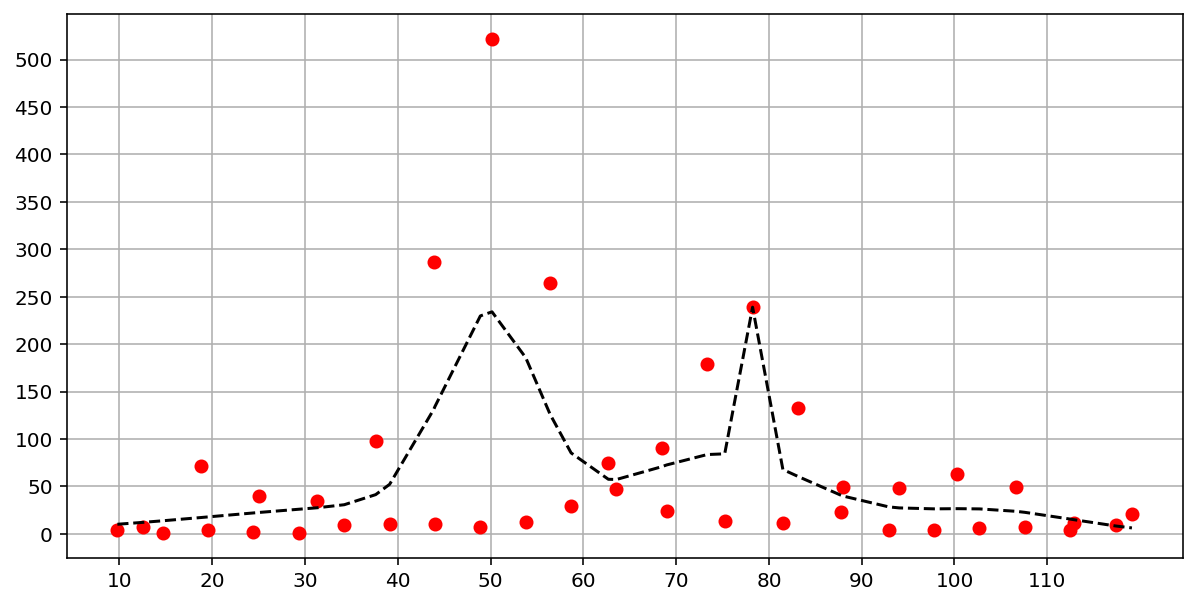

In [108]:
from scipy.optimize import curve_fit
popt_2gauss, pcov_2gauss = curve_fit(gaussian_func, X2, Y2, p0=P0)

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,5))
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 550, 50))
plt.grid()
ax.plot(X2, Y2, "ro")
ax.plot(X2, gaussian_func(X2, *popt_2gauss), 'k--')

In [ ]:
Resedual = minimize(calc_error, P0, method='Newton-CG',jac=opti_jac, hess=opti_hess ,options={'xtol': 1e-8,'disp': True})

In [ ]:
plot_fitting_func(Resedual.x, X2, Y2, diameter_frequency,'diameter of each particle','frequency')